In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from scipy.optimize import curve_fit
from matplotlib import rcParams

import utilities as ut

# Definimos el area de la cabecilla del imán en mm^2
HEAD_AREA_MM2 = 1000*(924)*1e-6  #largo*(diametro) de la cabecilla [µm^2 -> mm^2]
FRAME_PER_SECOND = 60

COLOR = 'black'
plt.style.use("default")
rcParams["font.family"] = "serif"
rcParams["mathtext.fontset"] = "cm"
rcParams['figure.figsize'] = (28, 18)
rcParams['figure.titlesize'] = 20
rcParams['figure.dpi'] = 50
rcParams['axes.grid'] = False
rcParams['axes.facecolor'] = 'lightgray'
rcParams['legend.fontsize'] = 30
rcParams['axes.titlesize'] = 60
rcParams['axes.labelsize'] = 50
rcParams['ytick.labelsize'] = 25
rcParams['xtick.labelsize'] = 25
rcParams['text.color'] = COLOR
rcParams['text.color'] = COLOR
rcParams['axes.labelcolor'] = COLOR
rcParams['xtick.color'] = COLOR
rcParams['ytick.color'] = COLOR
rcParams['grid.color'] = COLOR
rcParams['text.latex.preamble'] = "\n".join([
    r'\usepackage[version=3]{mhchem}'
])

In [3]:
#Obtenemos la calibración del video que vamos a usar
video_name = 'ECO20-45mm-2,00Vpp-8Hz.mp4'
vs = cv.VideoCapture('example_media/{0}'.format(video_name))
limites = [319, 950, 250, 505]

#La función de calibración devuelve el resultado en px/mm
calibracion, delta_calibracion = ut.calibrate_with_head(vs, limites, HEAD_AREA_MM2)

print('Calibración promedio es: {0} +/- {1}'.format(np.mean(calibracion), np.mean(delta_calibracion)))

px_per_mm = np.mean(calibracion)

Calibración promedio es: 7.479115910948772 +/- 0.008596573337805995


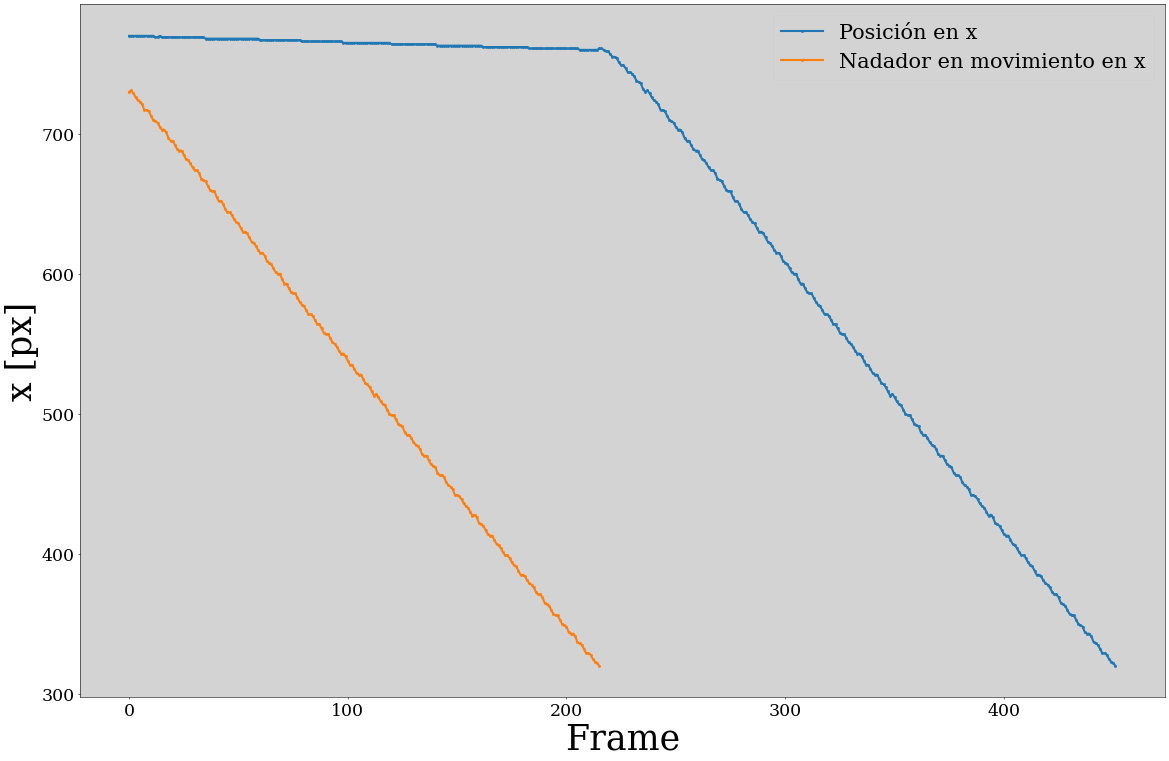

In [8]:
#Defino el nombre de mi archivo y creo el objeto de VideoCapture
video_name = 'ECO20-45mm-2,00Vpp-8Hz.mp4'
vs = cv.VideoCapture('example_media/{0}'.format(video_name))

#Defino los limites de mi imagen (x0, x1, y0, y1)
#Estos limites son los que se usan en la función track_head para enfocar el area del nadador
limites = [319, 950, 250, 505]

#Devuelve la posición de la cabeza del nadador en la imagen en pixeles
pos_x, pos_y = ut.track_head(vs, limites, SHOW=True)

#La posicíon es relativa a los límites que recortamos asi que movemos el 0,0 a la posición original
pos_x+=limites[0]
pos_y+=limites[2]

#Removemos los momentos en los que el nadador está quieto
start = pos_x[0]
nonconstant_ids = np.where(pos_x<=start*0.95)[0]

plt.plot(pos_x,'.-',lw=3, label='Posición en x')
plt.plot(pos_x[nonconstant_ids],'.-',lw=3, label='Nadador en movimiento en x')
plt.xlabel('Frame')
plt.ylabel('x [px]')
plt.legend()

La velocidad terminal es: -15.458909522102937 +/- 0.010595335061481647 mm/s


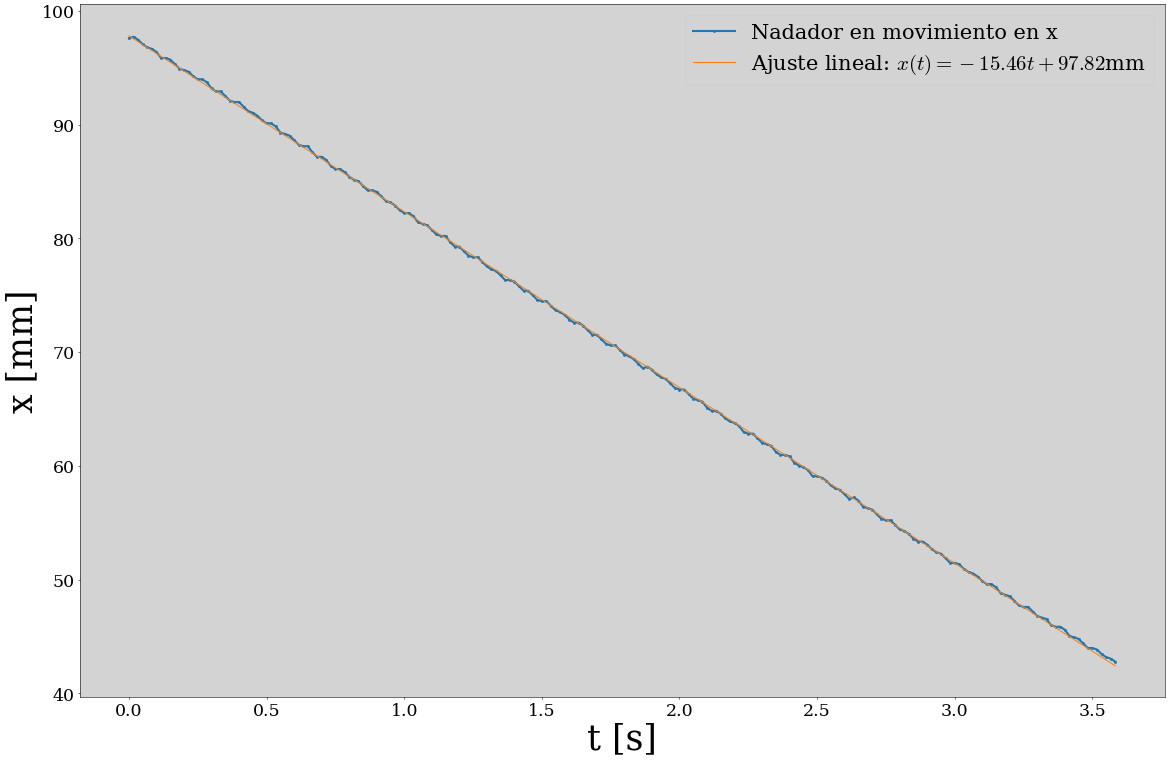

In [ ]:
f_lineal = lambda x, a, b: a*x + b
cal_pos_x = pos_x[nonconstant_ids]/px_per_mm
frame_array = np.arange(len(cal_pos_x))/FRAME_PER_SECOND
params, cov = curve_fit(f_lineal, frame_array, cal_pos_x)

#Como el nadador nada a derecha la velocidad terminal es negativa, posteriormente se tiene que tomar el valor absoluto
print('La velocidad terminal es: {0} +/- {1} mm/s'.format(params[0], np.sqrt(cov[0,0])))

plt.plot(frame_array,cal_pos_x,'.-',lw=3, label='Nadador en movimiento en x')
plt.plot(frame_array, f_lineal(frame_array, *params), label='Ajuste lineal: $x(t) = {0:.2f}t + {1:.2f}$mm'.format(*params))
plt.xlabel('t [s]')
plt.ylabel('x [mm]')
plt.legend()